# Tests durant la phase de code
Pour vérifier les implémentations

In [1]:
import sys
sys.path.append('..')

Solution : [0.99999722 2.99999729]
Attendu : [1, 3]
Itérations : 82


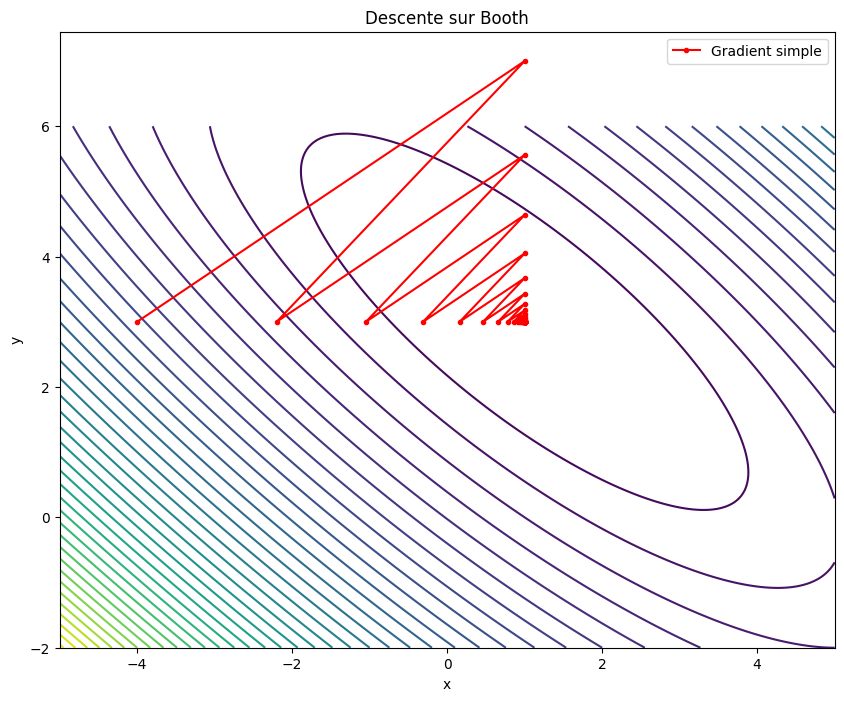

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.functions import booth, rosenbrock
from src.gradients import gradient_numerique
from src.optimizers import gradient_descent, gradient_descent_momentum, gradient_descent_adam
from src.visualization import plot_contours, plot_trajectory

# Test simple sur Booth
x0 = np.array([-4.0, 3.0])
grad_f = lambda x: gradient_numerique(booth, x)

sol, traj = gradient_descent(booth, grad_f, x0, learning_rate=0.1)
print(f"Solution : {sol}")
print(f"Attendu : [1, 3]")
print(f"Itérations : {len(traj)}")

# Visualiser
plt.figure(figsize=(10, 8))
plot_contours(booth, xlim=(-5, 5), ylim=(-2, 6))
plot_trajectory(traj, color='red', label='Gradient simple')
plt.legend()
plt.title("Descente sur Booth")
plt.show()

In [3]:
# Test des DualNumbers après ajout des fonctions utilitaires

import numpy as np
from src.gradients import gradient_numerique, gradient_dual
from src.functions import booth

x_test = np.array([2.0, 3.0])

grad_num = gradient_numerique(booth, x_test)
grad_dual = gradient_dual(booth, x_test)

print(f"Point de test : {x_test}")
print(f"Gradient numérique : {grad_num}")
print(f"Gradient dual      : {grad_dual}")
print(f"Différence         : {np.abs(grad_num - grad_dual)}")
# Les deux devraient être presque identiques

Point de test : [2. 3.]
Gradient numérique : [10.00005  8.00005]
Gradient dual      : [10.  8.]
Différence         : [4.99999808e-05 4.99997013e-05]


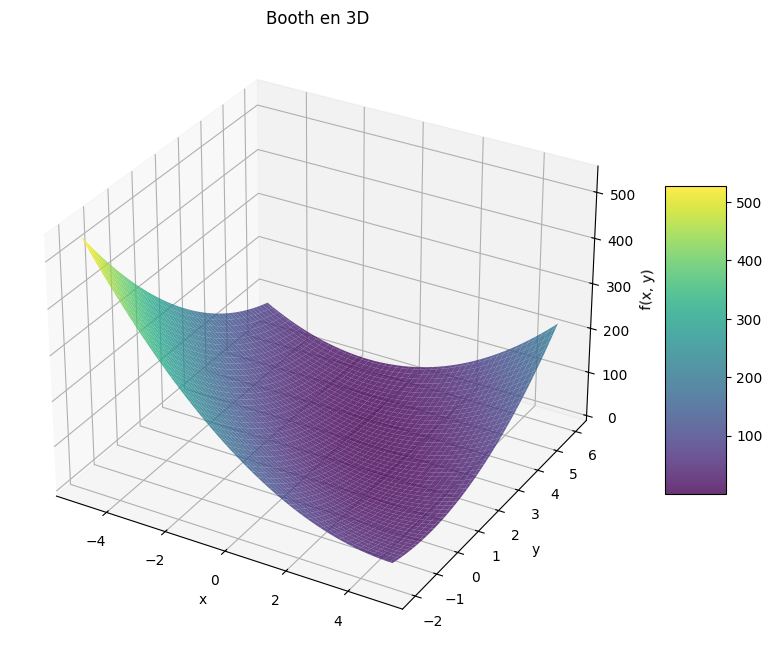

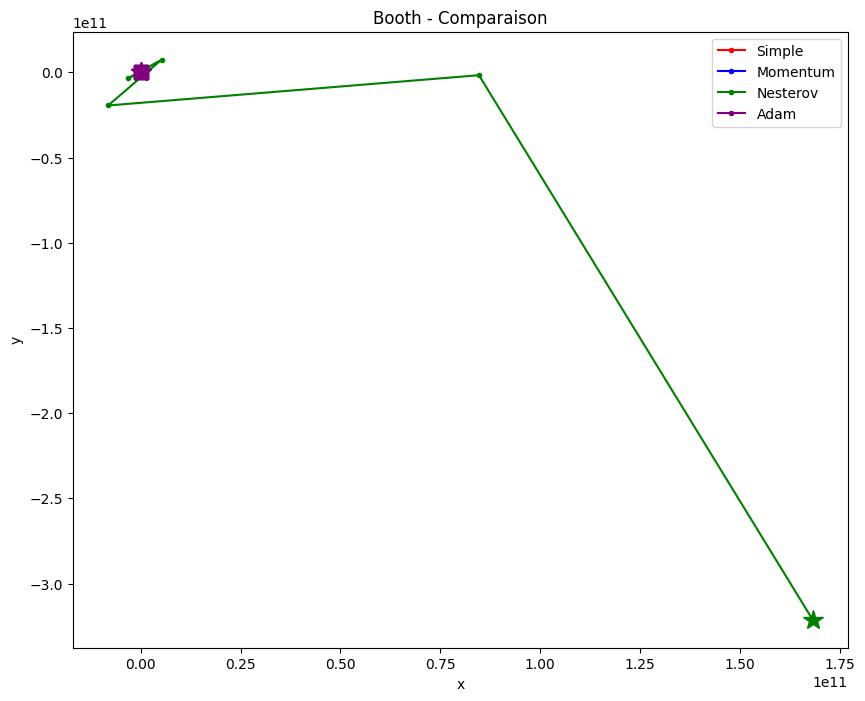

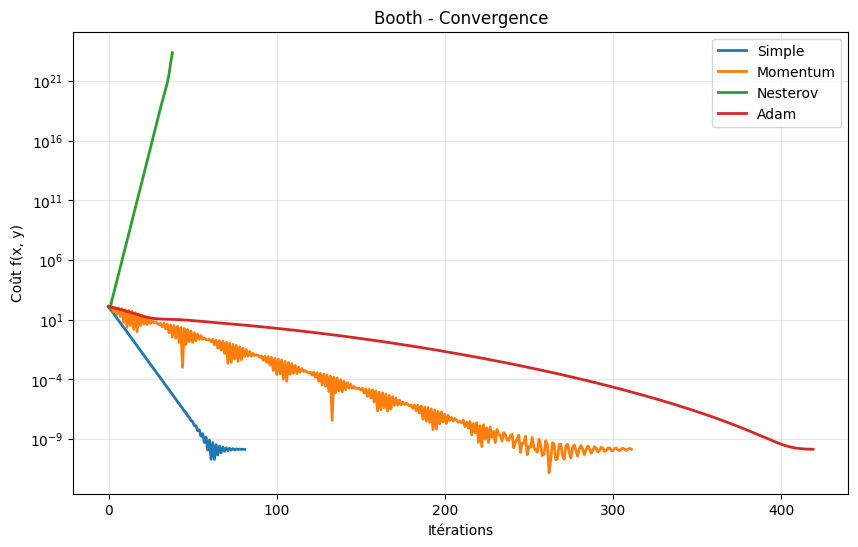

Nombre d'itérations par algo :
  Simple: 82
  Momentum: 312
  Nesterov: 39
  Adam: 420


In [4]:
# Test après modifications de visualization et ajout de la 3D + tous les algos

import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from src.functions import booth
from src.gradients import gradient_numerique
from src.optimizers import (gradient_descent, gradient_descent_momentum, 
                            gradient_descent_nesterov, gradient_descent_adam)
from src.visualization import (plot_surface_3d, plot_convergence, 
                               plot_gradient_norm, plot_comparison)

# point de départ
x0 = np.array([-4.0, 3.0])
grad_f = lambda x: gradient_numerique(booth, x)

# on lance les 4 algos
_, traj_simple = gradient_descent(booth, grad_f, x0, learning_rate=0.1)
_, traj_momentum = gradient_descent_momentum(booth, grad_f, x0, learning_rate=0.1)
_, traj_nesterov = gradient_descent_nesterov(booth, grad_f, x0, learning_rate=0.1)
_, traj_adam = gradient_descent_adam(booth, grad_f, x0, learning_rate=0.1)

trajectories = {
    "Simple": traj_simple,
    "Momentum": traj_momentum,
    "Nesterov": traj_nesterov,
    "Adam": traj_adam
}

# test surface 3D
plot_surface_3d(booth, xlim=(-5, 5), ylim=(-2, 6), title="Booth en 3D")
plt.show()

# test comparaison
plot_comparison(booth, trajectories, xlim=(-5, 5), ylim=(-2, 6), title="Booth - Comparaison")
plt.show()

# test convergence
plot_convergence(trajectories, booth, title="Booth - Convergence")
plt.show()

# petit récap
print("Nombre d'itérations par algo :")
for name, traj in trajectories.items():
    print(f"  {name}: {len(traj)}")

# Expériences (phase 1 - tests)

## 1. Comparer les vitesses des algorithmes

Objectif : Faire un tableau comparatif du nombre d'itérations pour converger.

Observations :
- Booth : tous convergent rapidement
- Rosenbrock : Adam converge mieux, Simple peut avoir du mal
- Quadratique y = 10 : Simple fait des zigzags, Momentum aide

In [5]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
from src.functions import booth, rosenbrock, beale, himmelblau, quadratique
from src.gradients import gradient_numerique
from src.optimizers import (gradient_descent, gradient_descent_momentum,
                            gradient_descent_nesterov, gradient_descent_adam)

def comparer_algos(f, x0, lr=0.01, nom_fonction=""):
    """Compare les 4 algos sur une fonction donnée."""
    grad_f = lambda x: gradient_numerique(f, x)
    
    resultats = {}
    
    # Descente simple
    sol, traj = gradient_descent(f, grad_f, x0, learning_rate=lr, max_iter=5000)
    resultats["Simple"] = {"iterations": len(traj), "solution": sol, "converge": len(traj) < 5000}
    
    # Momentum
    sol, traj = gradient_descent_momentum(f, grad_f, x0, learning_rate=lr, max_iter=5000)
    resultats["Momentum"] = {"iterations": len(traj), "solution": sol, "converge": len(traj) < 5000}
    
    # Nesterov
    sol, traj = gradient_descent_nesterov(f, grad_f, x0, learning_rate=lr, max_iter=5000)
    resultats["Nesterov"] = {"iterations": len(traj), "solution": sol, "converge": len(traj) < 5000}
    
    # Adam
    sol, traj = gradient_descent_adam(f, grad_f, x0, learning_rate=lr, max_iter=5000)
    resultats["Adam"] = {"iterations": len(traj), "solution": sol, "converge": len(traj) < 5000}
    
    print(f"\n=== {nom_fonction} ===")
    print(f"Point de départ : {x0}, Learning rate : {lr}")
    print("-" * 50)
    for algo, data in resultats.items():
        status = "✓" if data["converge"] else "✗ (max iter)"
        print(f"{algo:12} : {data['iterations']:5} itérations {status}")
        print(f"             Solution : [{data['solution'][0]:.4f}, {data['solution'][1]:.4f}]")
    
    return resultats

# === TESTS ===

# Booth (facile) - minimum en (1, 3)
x0 = np.array([-4.0, 3.0])
comparer_algos(booth, x0, lr=0.1, nom_fonction="Booth")

# Rosenbrock (difficile, ravine) - minimum en (1, 1)
x0 = np.array([-1.0, -1.0])
comparer_algos(rosenbrock, x0, lr=0.001, nom_fonction="Rosenbrock")

# Quadratique avec gamma=10 (ravine) - minimum en (0, 0)
f_quad = lambda x: quadratique(x, gamma=10)
x0 = np.array([5.0, 5.0])
comparer_algos(f_quad, x0, lr=0.05, nom_fonction="Quadratique γ=10")


=== Booth ===
Point de départ : [-4.  3.], Learning rate : 0.1
--------------------------------------------------
Simple       :    82 itérations ✓
             Solution : [1.0000, 3.0000]
Momentum     :   312 itérations ✓
             Solution : [1.0000, 3.0000]
Nesterov     :    39 itérations ✓
             Solution : [168218494656.3806, -321241111935.1155]
Adam         :   420 itérations ✓
             Solution : [1.0000, 3.0000]

=== Rosenbrock ===
Point de départ : [-1. -1.], Learning rate : 0.001
--------------------------------------------------
Simple       :  5001 itérations ✗ (max iter)
             Solution : [0.9536, 0.9091]
Momentum     :    23 itérations ✓
             Solution : [-303340663429880.1250, 1782580639.0850]
Nesterov     :    17 itérations ✓
             Solution : [36333348409448.0625, 412877387.6596]
Adam         :  5001 itérations ✗ (max iter)
             Solution : [-0.1589, 0.0277]

=== Quadratique γ=10 ===
Point de départ : [5. 5.], Learning rate : 0.0

{'Simple': {'iterations': 154,
  'solution': array([-4.50103006e-06, -5.00000000e-06]),
  'converge': True},
 'Momentum': {'iterations': 320,
  'solution': array([-5.12861858e-06, -5.02314096e-06]),
  'converge': True},
 'Nesterov': {'iterations': 134,
  'solution': array([-6.36550532e-06, -5.00000000e-06]),
  'converge': True},
 'Adam': {'iterations': 354,
  'solution': array([-5.04711433e-06, -5.04711670e-06]),
  'converge': True}}

## 2. Influence du learning rate

Objectif : Montrer ce qui se passe quand le learning rate est trop grand ou trop petit.

Observations :
- lr trop petit : converge mais très lent
- lr trop grand : diverge (cost explose)
- Il y a une plage optimale

Le choix du learning rate est crucial et difficile

In [6]:
import matplotlib.pyplot as plt
from src.visualization import plot_comparison

def tester_learning_rates(f, x0, lrs, nom_fonction=""):
    """Teste différents learning rates."""
    grad_f = lambda x: gradient_numerique(f, x)
    
    print(f"\n=== {nom_fonction} - Influence du learning rate ===")
    
    for lr in lrs:
        try:
            sol, traj = gradient_descent(f, grad_f, x0, learning_rate=lr, max_iter=1000)
            cost_final = f(sol)
            
            if cost_final > 1e10 or np.isnan(cost_final):
                print(f"lr={lr:6} : DIVERGE ! (cost = {cost_final:.2e})")
            else:
                print(f"lr={lr:6} : {len(traj):4} itérations, cost final = {cost_final:.6f}")
        except:
            print(f"lr={lr:6} : ERREUR (overflow probable)")

# Test sur Booth
x0 = np.array([-4.0, 3.0])
tester_learning_rates(booth, x0, [0.001, 0.01, 0.1, 0.5, 1.0], "Booth")

# Test sur Rosenbrock (plus sensible)
x0 = np.array([-1.0, -1.0])
tester_learning_rates(rosenbrock, x0, [0.0001, 0.001, 0.01, 0.1], "Rosenbrock")


=== Booth - Influence du learning rate ===
lr= 0.001 : 1001 itérations, cost final = 0.228030
lr=  0.01 :  782 itérations, cost final = 0.000000
lr=   0.1 :   82 itérations, cost final = 0.000000
lr=   0.5 : DIVERGE ! (cost = 1.54e+24)
lr=   1.0 : DIVERGE ! (cost = 2.21e+24)

=== Rosenbrock - Influence du learning rate ===
lr=0.0001 : 1001 itérations, cost final = 0.872334
lr= 0.001 : 1001 itérations, cost final = 0.111670
lr=  0.01 : DIVERGE ! (cost = 6.02e+123)
lr=   0.1 : DIVERGE ! (cost = 9.85e+95)


## 3. Illustrer les pièges 

### Piège 1 : Ravine (zigzags)

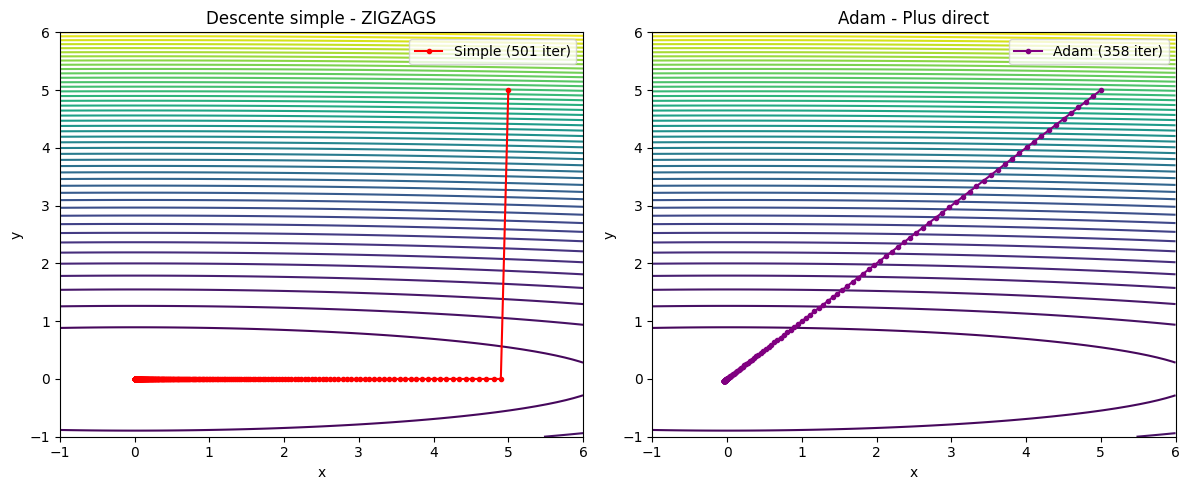


Ravine (γ=50) :
  Simple : 501 itérations (zigzags)
  Adam   : 358 itérations (plus efficace)


In [7]:
import matplotlib.pyplot as plt
from src.visualization import plot_contours, plot_trajectory

# Fonction avec ravine : gamma grand = ravine prononcée
f_ravine = lambda x: quadratique(x, gamma=50)
grad_f = lambda x: gradient_numerique(f_ravine, x)

x0 = np.array([5.0, 5.0])

# Descente simple : zigzags
_, traj_simple = gradient_descent(f_ravine, grad_f, x0, learning_rate=0.01, max_iter=500)

# Adam : plus direct
_, traj_adam = gradient_descent_adam(f_ravine, grad_f, x0, learning_rate=0.1, max_iter=500)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_contours(f_ravine, xlim=(-1, 6), ylim=(-1, 6))
plot_trajectory(traj_simple, color='red', label=f'Simple ({len(traj_simple)} iter)')
plt.title("Descente simple - ZIGZAGS")
plt.legend()

plt.subplot(1, 2, 2)
plot_contours(f_ravine, xlim=(-1, 6), ylim=(-1, 6))
plot_trajectory(traj_adam, color='purple', label=f'Adam ({len(traj_adam)} iter)')
plt.title("Adam - Plus direct")
plt.legend()

plt.tight_layout()
plt.savefig('../figures/piege_ravine.png', dpi=150)
plt.show()

print(f"\nRavine (γ=50) :")
print(f"  Simple : {len(traj_simple)} itérations (zigzags)")
print(f"  Adam   : {len(traj_adam)} itérations (plus efficace)")

### Piège 2 : Plateau 

In [8]:
from src.functions import exponentielle

# g(x,y) = 1 - exp(-10x² - y²) : plateau loin de l'origine
grad_f = lambda x: gradient_numerique(exponentielle, x)

# Départ loin : on est sur le plateau
x0 = np.array([2.0, 2.0])

_, traj_simple = gradient_descent(exponentielle, grad_f, x0, learning_rate=0.1, max_iter=1000)
_, traj_momentum = gradient_descent_momentum(exponentielle, grad_f, x0, learning_rate=0.1, max_iter=1000)

print(f"\nPlateau (départ loin) :")
print(f"  Simple   : {len(traj_simple)} itérations")
print(f"  Momentum : {len(traj_momentum)} itérations")
print(f"  → Momentum garde de l'élan et traverse plus vite")


Plateau (départ loin) :
  Simple   : 1 itérations
  Momentum : 1 itérations
  → Momentum garde de l'élan et traverse plus vite


### Piège 3 : Minima locaux

In [9]:
from src.functions import himmelblau

# Himmelblau a 4 minima : selon le départ, on tombe dans un différent
grad_f = lambda x: gradient_numerique(himmelblau, x)

departs = [
    np.array([0.0, 0.0]),
    np.array([4.0, 4.0]),
    np.array([-4.0, 4.0]),
    np.array([-4.0, -4.0]),
]

print("\nHimmelblau - Différents minima selon le départ :")
for x0 in departs:
    sol, traj = gradient_descent(himmelblau, grad_f, x0, learning_rate=0.01)
    print(f"  Départ {x0} → Arrivée [{sol[0]:.3f}, {sol[1]:.3f}]")


Himmelblau - Différents minima selon le départ :
  Départ [0. 0.] → Arrivée [3.000, 2.000]
  Départ [4. 4.] → Arrivée [3.000, 2.000]
  Départ [-4.  4.] → Arrivée [-2.805, 3.131]
  Départ [-4. -4.] → Arrivée [-3.779, -3.283]


# 4. Dual vs Numérique sur Ackley

Problème : La fonction Ackley utilise exp, cos, sqrt -> il faut une verison compatible avec DualNumber, d'où les fonctions utilitaires ajoutées.

!!! Créer ackley_dual dans functions.py :

## Version d'Ackley compatible avec les nombres duaux
### (à utiliser avec gradient_dual)

def ackley_dual_compatible(x):
    """
    Ackley pour les nombres duaux.
    Utilise les fonctions de src.gradients pour être compatible.
    """
    from src.gradients import dual_exp, dual_cos, dual_sqrt
    
    x1, x2 = x[0], x[1]
    
    term1 = -20 * dual_exp(-0.2 * dual_sqrt(0.5 * (x1**2 + x2**2)))
    term2 = -dual_exp(0.5 * (dual_cos(2 * 3.14159265359 * x1) + dual_cos(2 * 3.14159265359 * x2)))
    
    return term1 + term2 + 2.71828182846 + 20

In [10]:
import time
from src.functions import ackley
from src.gradients import gradient_numerique, gradient_dual

# On doit d'abord ajouter ackley_dual_compatible à functions.py
# (voir le code ci-dessus)

x_test = np.array([0.5, 0.5])

# Gradient numérique
start = time.time()
for _ in range(1000):
    grad_num = gradient_numerique(ackley, x_test)
time_num = time.time() - start

# Gradient dual (si ackley_dual_compatible est ajouté)
# from src.functions import ackley_dual_compatible
# start = time.time()
# for _ in range(1000):
#     grad_dual = gradient_dual(ackley_dual_compatible, x_test)
# time_dual = time.time() - start

print("=== Comparaison Dual vs Numérique sur Ackley ===")
print(f"Gradient numérique : {grad_num}")
# print(f"Gradient dual      : {grad_dual}")
print(f"\nTemps pour 1000 calculs :")
print(f"  Numérique : {time_num:.4f} s")
# print(f"  Dual      : {time_dual:.4f} s")
print(f"\nPrécision : les deux devraient donner des valeurs très proches")

=== Comparaison Dual vs Numérique sur Ackley ===
Gradient numérique : [1.80964667 1.80964667]

Temps pour 1000 calculs :
  Numérique : 0.0274 s

Précision : les deux devraient donner des valeurs très proches


## 5. Cas qui ne fonctionnent pas

### Cas 1 : Divergences avec learning rate trop grand

In [11]:
# Rosenbrock avec lr=0.1 → DIVERGE
x0 = np.array([-1.0, -1.0])
grad_f = lambda x: gradient_numerique(rosenbrock, x)

sol, traj = gradient_descent(rosenbrock, grad_f, x0, learning_rate=0.1, max_iter=100)

print("=== CAS D'ÉCHEC : Divergence ===")
print(f"Fonction : Rosenbrock")
print(f"Learning rate : 0.1 (trop grand)")
print(f"Cost final : {rosenbrock(sol):.2e}")
print(f"→ DIVERGE car le learning rate est trop grand pour cette fonction")
print(f"\nSOLUTION : Réduire le learning rate à 0.001")

# Correction
sol2, traj2 = gradient_descent(rosenbrock, grad_f, x0, learning_rate=0.001, max_iter=10000)
print(f"Avec lr=0.001 : converge en {len(traj2)} itérations")
print(f"Solution : [{sol2[0]:.4f}, {sol2[1]:.4f}] (attendu : [1, 1])")

=== CAS D'ÉCHEC : Divergence ===
Fonction : Rosenbrock
Learning rate : 0.1 (trop grand)
Cost final : 9.85e+95
→ DIVERGE car le learning rate est trop grand pour cette fonction

SOLUTION : Réduire le learning rate à 0.001
Avec lr=0.001 : converge en 10001 itérations
Solution : [0.9916, 0.9832] (attendu : [1, 1])


### Cas 2 : Oscillations sans convergence

In [12]:
# Quadratique avec gamma très grand → oscillations
f_ravine = lambda x: quadratique(x, gamma=100)
grad_f = lambda x: gradient_numerique(f_ravine, x)
x0 = np.array([5.0, 5.0])

sol, traj = gradient_descent(f_ravine, grad_f, x0, learning_rate=0.02, max_iter=500)

print("\n=== CAS D'ÉCHEC : Oscillations ===")
print(f"Fonction : x² + 100y² (ravine très prononcée)")
print(f"Learning rate : 0.02")
print(f"→ Fait des zigzags perpendiculaires à la ravine")
print(f"\nSOLUTION : Utiliser Momentum ou Adam")

# Correction avec Adam
sol2, traj2 = gradient_descent_adam(f_ravine, grad_f, x0, learning_rate=0.1, max_iter=500)
print(f"Avec Adam : converge en {len(traj2)} itérations")


=== CAS D'ÉCHEC : Oscillations ===
Fonction : x² + 100y² (ravine très prononcée)
Learning rate : 0.02
→ Fait des zigzags perpendiculaires à la ravine

SOLUTION : Utiliser Momentum ou Adam
Avec Adam : converge en 359 itérations


### Cas 3 : Stagnation sur un plateau

In [13]:
# Exponentielle avec départ très loin
x0 = np.array([3.0, 3.0])
grad_f = lambda x: gradient_numerique(exponentielle, x)

sol, traj = gradient_descent(exponentielle, grad_f, x0, learning_rate=0.1, max_iter=100)

print("\n=== CAS D'ÉCHEC : Stagnation ===")
print(f"Fonction : 1 - exp(-10x² - y²)")
print(f"Départ : [3, 3] (loin du minimum)")
print(f"Après 100 itérations : [{sol[0]:.4f}, {sol[1]:.4f}]")
print(f"→ Presque pas bougé car le gradient est quasi nul sur le plateau")
print(f"\nSOLUTION : Augmenter max_iter ou utiliser Momentum")


=== CAS D'ÉCHEC : Stagnation ===
Fonction : 1 - exp(-10x² - y²)
Départ : [3, 3] (loin du minimum)
Après 100 itérations : [3.0000, 3.0000]
→ Presque pas bougé car le gradient est quasi nul sur le plateau

SOLUTION : Augmenter max_iter ou utiliser Momentum


### Cas 4 : Minimum local au lieu de global

In [14]:
# Himmelblau - on veut (3, 2) mais on tombe ailleurs
x0 = np.array([-3.0, -3.0])
grad_f = lambda x: gradient_numerique(himmelblau, x)

sol, traj = gradient_descent(himmelblau, grad_f, x0, learning_rate=0.01)

print("\n=== CAS D'ÉCHEC : Minimum local ===")
print(f"Fonction : Himmelblau (4 minima)")
print(f"Départ : [-3, -3]")
print(f"Arrivée : [{sol[0]:.4f}, {sol[1]:.4f}]")
print(f"→ Tombe dans le minimum local le plus proche, pas le global")
print(f"\nSOLUTION : Essayer plusieurs points de départ")


=== CAS D'ÉCHEC : Minimum local ===
Fonction : Himmelblau (4 minima)
Départ : [-3, -3]
Arrivée : [-3.7793, -3.2832]
→ Tombe dans le minimum local le plus proche, pas le global

SOLUTION : Essayer plusieurs points de départ


# Expériences (phase 2 - version finale)
Avec enregistrement des figures

### Setup et imports

In [15]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from src.functions import booth, rosenbrock, beale, himmelblau, quadratique, exponentielle, ackley
from src.gradients import gradient_numerique, gradient_dual
from src.optimizers import (gradient_descent, gradient_descent_momentum,
                            gradient_descent_nesterov, gradient_descent_adam)
from src.visualization import (plot_contours, plot_trajectory, plot_surface_3d,
                               plot_convergence, plot_gradient_norm, plot_comparison)

# pour que les figures soient plus grandes
plt.rcParams['figure.figsize'] = [10, 8]

print("✓ Imports OK")

✓ Imports OK


### Fonctions utilitaires pour comparer les algorithmes

In [16]:
def comparer_algos(f, x0, lr=0.01, nom_fonction="", max_iter=5000):
    """
    Compare les 4 algos sur une fonction donnée.
    Retourne un dictionnaire avec les résultats.
    """
    grad_f = lambda x: gradient_numerique(f, x)
    
    resultats = {}
    trajectoires = {}
    
    # Descente simple
    sol, traj = gradient_descent(f, grad_f, x0, learning_rate=lr, max_iter=max_iter)
    resultats["Simple"] = {"iterations": len(traj), "solution": sol.copy(), "cost": f(sol)}
    trajectoires["Simple"] = traj
    
    # Momentum
    sol, traj = gradient_descent_momentum(f, grad_f, x0, learning_rate=lr, max_iter=max_iter)
    resultats["Momentum"] = {"iterations": len(traj), "solution": sol.copy(), "cost": f(sol)}
    trajectoires["Momentum"] = traj
    
    # Nesterov
    sol, traj = gradient_descent_nesterov(f, grad_f, x0, learning_rate=lr, max_iter=max_iter)
    resultats["Nesterov"] = {"iterations": len(traj), "solution": sol.copy(), "cost": f(sol)}
    trajectoires["Nesterov"] = traj
    
    # Adam
    sol, traj = gradient_descent_adam(f, grad_f, x0, learning_rate=lr, max_iter=max_iter)
    resultats["Adam"] = {"iterations": len(traj), "solution": sol.copy(), "cost": f(sol)}
    trajectoires["Adam"] = traj
    
    # Affichage
    print(f"\n{'='*60}")
    print(f"  {nom_fonction}")
    print(f"  Point de départ : {x0}, Learning rate : {lr}")
    print(f"{'='*60}")
    print(f"{'Algo':<12} {'Itérations':>12} {'Cost final':>15} {'Solution':>20}")
    print("-" * 60)
    
    for algo, data in resultats.items():
        sol_str = f"[{data['solution'][0]:.4f}, {data['solution'][1]:.4f}]"
        print(f"{algo:<12} {data['iterations']:>12} {data['cost']:>15.6f} {sol_str:>20}")
    
    return resultats, trajectoires

print("✓ Fonction comparer_algos définie")

✓ Fonction comparer_algos définie


## Expérience 1

### 1.1 Comparaison des vitesses sur Booth


  EXPÉRIENCE 1 : Comparaison des vitesses

  BOOTH - minimum attendu : (1, 3)
  Point de départ : [-4.  3.], Learning rate : 0.1
Algo           Itérations      Cost final             Solution
------------------------------------------------------------
Simple                 82        0.000000     [1.0000, 3.0000]
Momentum              312        0.000000     [1.0000, 3.0000]
Nesterov               39 225156999543592532836352.000000 [168218494656.3806, -321241111935.1155]
Adam                  420        0.000000     [1.0000, 3.0000]


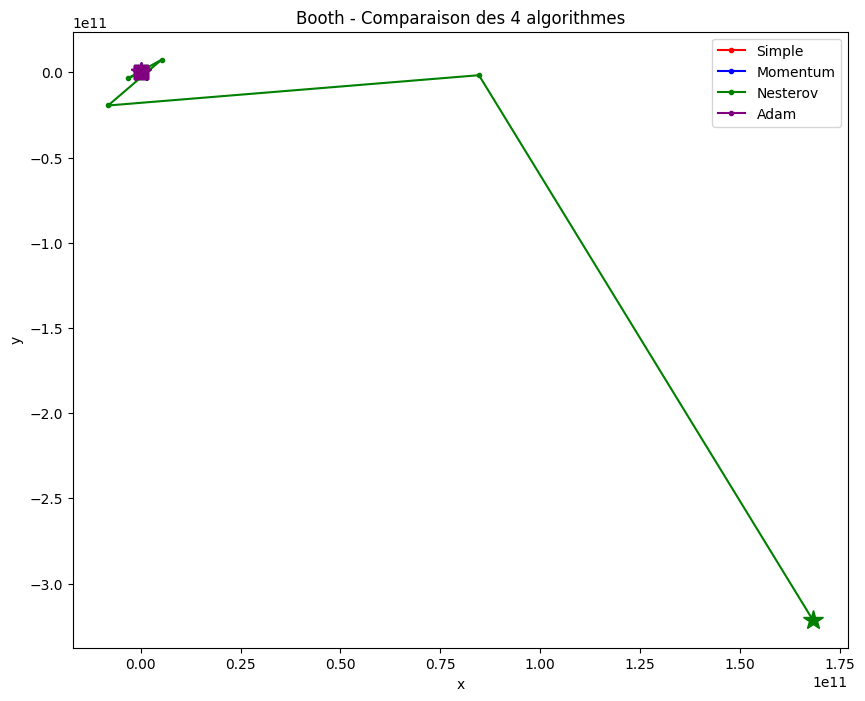

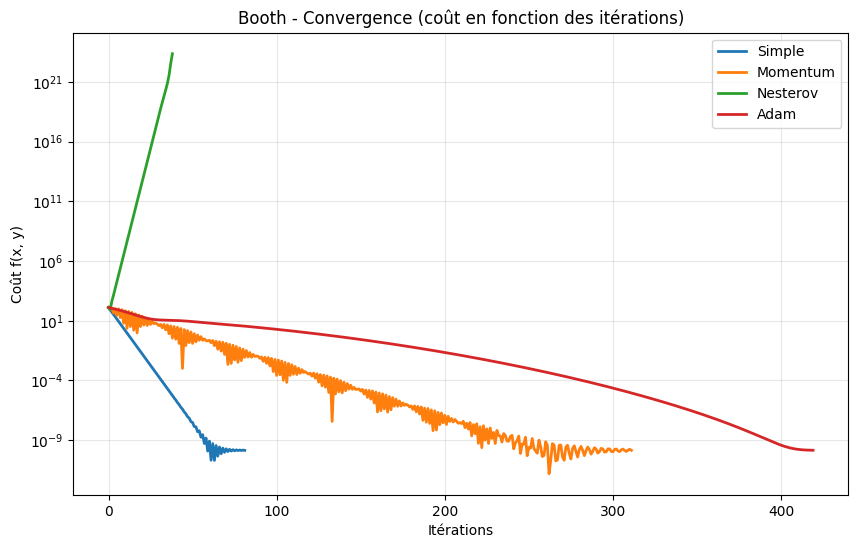


✓ Figures sauvegardées : exp1_booth_comparaison.png, exp1_booth_convergence.png


In [17]:
print("\n" + "="*70)
print("  EXPÉRIENCE 1 : Comparaison des vitesses")
print("="*70)

# Booth (facile) - minimum en (1, 3)
x0 = np.array([-4.0, 3.0])
res_booth, traj_booth = comparer_algos(booth, x0, lr=0.1, nom_fonction="BOOTH - minimum attendu : (1, 3)")

# Figure comparaison
plot_comparison(booth, traj_booth, xlim=(-5, 5), ylim=(-2, 6), title="Booth - Comparaison des 4 algorithmes")
plt.savefig('../figures/exp1_booth_comparaison.png', dpi=150, bbox_inches='tight')
plt.show()

# Figure convergence
plot_convergence(traj_booth, booth, title="Booth - Convergence (coût en fonction des itérations)")
plt.savefig('../figures/exp1_booth_convergence.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figures sauvegardées : exp1_booth_comparaison.png, exp1_booth_convergence.png")



### 1.2 Rosenbrock


  ROSENBROCK - minimum attendu : (1, 1)
  Point de départ : [-1. -1.], Learning rate : 0.001
Algo           Itérations      Cost final             Solution
------------------------------------------------------------
Simple               5001        0.002160     [0.9536, 0.9091]
Momentum               23 846686293062885165837192509773589754281570937379913902063616.000000 [-303340663429880.1250, 1782580639.0850]
Nesterov               17 174269623812611313121563413944116993278308260351186042880.000000 [36333348409448.0625, 412877387.6596]
Adam                 5001        1.343598    [-0.1589, 0.0277]


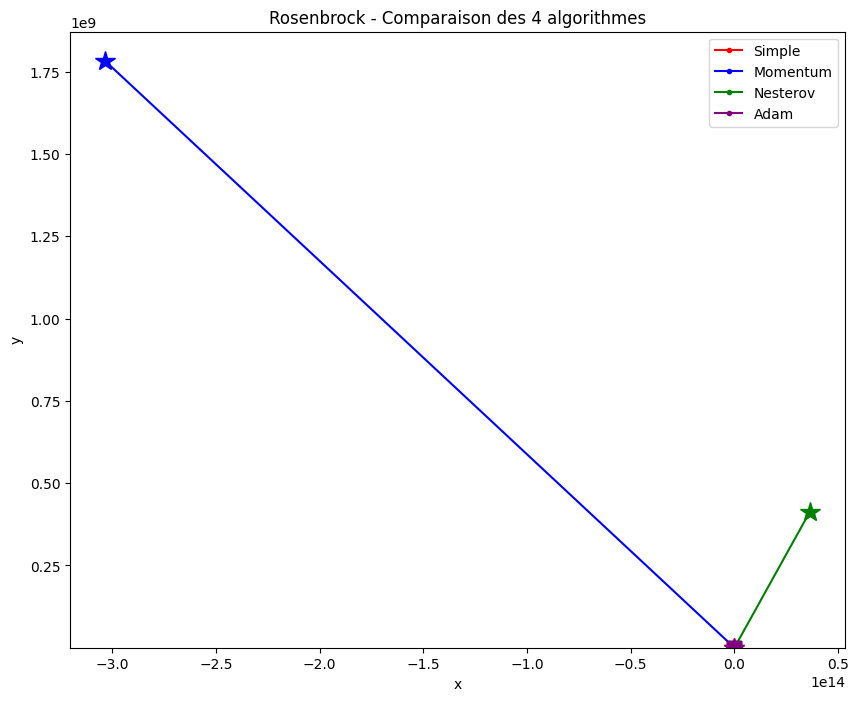

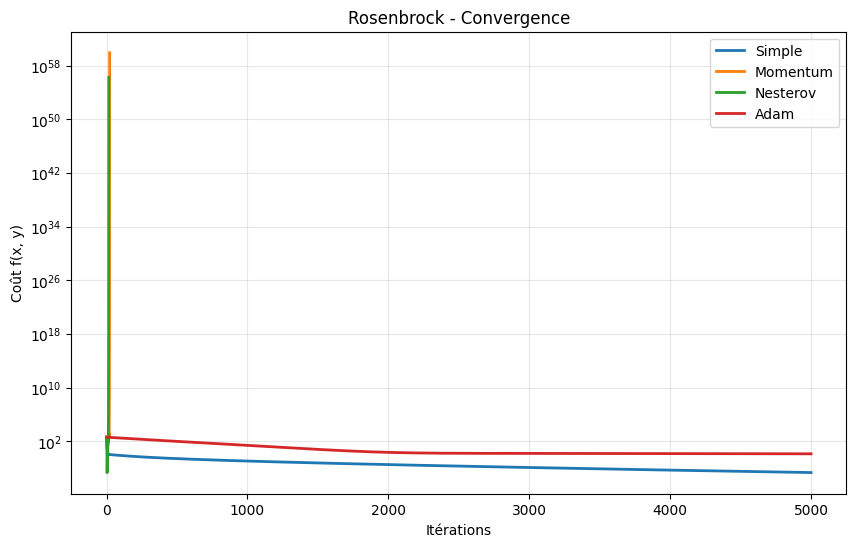


✓ Figures sauvegardées : exp1_rosenbrock_comparaison.png, exp1_rosenbrock_convergence.png


In [18]:
# Rosenbrock (difficile, ravine) - minimum en (1, 1)
x0 = np.array([-1.0, -1.0])
res_rosen, traj_rosen = comparer_algos(rosenbrock, x0, lr=0.001, nom_fonction="ROSENBROCK - minimum attendu : (1, 1)")

# Figure comparaison
plot_comparison(rosenbrock, traj_rosen, xlim=(-2, 2), ylim=(-2, 2), title="Rosenbrock - Comparaison des 4 algorithmes")
plt.savefig('../figures/exp1_rosenbrock_comparaison.png', dpi=150, bbox_inches='tight')
plt.show()

# Figure convergence
plot_convergence(traj_rosen, rosenbrock, title="Rosenbrock - Convergence")
plt.savefig('../figures/exp1_rosenbrock_convergence.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figures sauvegardées : exp1_rosenbrock_comparaison.png, exp1_rosenbrock_convergence.png")




### 1.3 Quadratique avec ravine


  QUADRATIQUE γ=10 - minimum attendu : (0, 0)
  Point de départ : [5. 5.], Learning rate : 0.05
Algo           Itérations      Cost final             Solution
------------------------------------------------------------
Simple                154        0.000000   [-0.0000, -0.0000]
Momentum              320        0.000000   [-0.0000, -0.0000]
Nesterov              134        0.000000   [-0.0000, -0.0000]
Adam                  354        0.000000   [-0.0000, -0.0000]


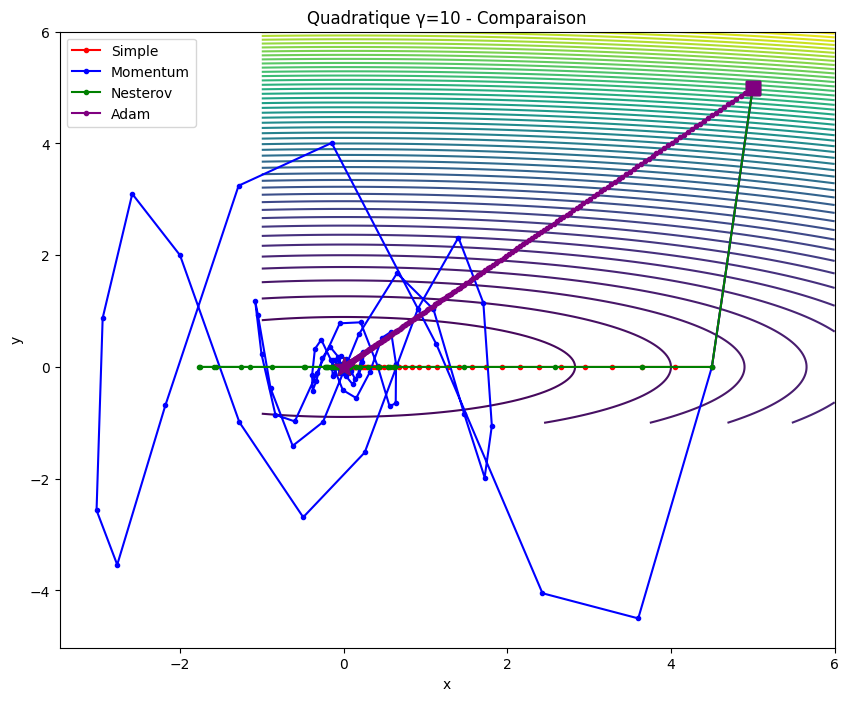


✓ Figure sauvegardée : exp1_quadratique_comparaison.png


In [19]:
# Quadratique avec gamma=10 (ravine) - minimum en (0, 0)
f_quad = lambda x: quadratique(x, gamma=10)
x0 = np.array([5.0, 5.0])
res_quad, traj_quad = comparer_algos(f_quad, x0, lr=0.05, nom_fonction="QUADRATIQUE γ=10 - minimum attendu : (0, 0)")

# Figure comparaison
plot_comparison(f_quad, traj_quad, xlim=(-1, 6), ylim=(-1, 6), title="Quadratique γ=10 - Comparaison")
plt.savefig('../figures/exp1_quadratique_comparaison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figure sauvegardée : exp1_quadratique_comparaison.png")

## Expérience 2

### 2.1 Influence du learning rate

In [20]:
print("\n" + "="*70)
print("  EXPÉRIENCE 2 : Influence du learning rate")
print("="*70)

def tester_learning_rates(f, x0, lrs, nom_fonction=""):
    """Teste différents learning rates et retourne les résultats."""
    grad_f = lambda x: gradient_numerique(f, x)
    resultats = []
    
    print(f"\n{nom_fonction}")
    print(f"Point de départ : {x0}")
    print("-" * 50)
    
    for lr in lrs:
        try:
            sol, traj = gradient_descent(f, grad_f, x0, learning_rate=lr, max_iter=1000)
            cost_final = f(sol)
            
            if cost_final > 1e10 or np.isnan(cost_final):
                status = "DIVERGE"
                print(f"  lr={lr:<8} : ❌ DIVERGE (cost = {cost_final:.2e})")
            else:
                status = "OK"
                print(f"  lr={lr:<8} : ✓ {len(traj):4} itér., cost = {cost_final:.6f}")
            
            resultats.append({"lr": lr, "iterations": len(traj), "cost": cost_final, "status": status})
        except Exception as e:
            print(f"  lr={lr:<8} : ❌ ERREUR ({e})")
            resultats.append({"lr": lr, "iterations": None, "cost": None, "status": "ERREUR"})
    
    return resultats

# Test sur Booth
x0 = np.array([-4.0, 3.0])
res_lr_booth = tester_learning_rates(booth, x0, [0.001, 0.01, 0.1, 0.5, 1.0, 1.5], "BOOTH - Test learning rate")

# Test sur Rosenbrock (plus sensible)
x0 = np.array([-1.0, -1.0])
res_lr_rosen = tester_learning_rates(rosenbrock, x0, [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], "ROSENBROCK - Test learning rate")




  EXPÉRIENCE 2 : Influence du learning rate

BOOTH - Test learning rate
Point de départ : [-4.  3.]
--------------------------------------------------
  lr=0.001    : ✓ 1001 itér., cost = 0.228030
  lr=0.01     : ✓  782 itér., cost = 0.000000
  lr=0.1      : ✓   82 itér., cost = 0.000000
  lr=0.5      : ❌ DIVERGE (cost = 1.54e+24)
  lr=1.0      : ❌ DIVERGE (cost = 2.21e+24)
  lr=1.5      : ❌ DIVERGE (cost = 1.06e+25)

ROSENBROCK - Test learning rate
Point de départ : [-1. -1.]
--------------------------------------------------
  lr=0.0001   : ✓ 1001 itér., cost = 0.872334
  lr=0.0005   : ✓ 1001 itér., cost = 0.271411
  lr=0.001    : ✓ 1001 itér., cost = 0.111670
  lr=0.005    : ❌ DIVERGE (cost = 4.65e+66)
  lr=0.01     : ❌ DIVERGE (cost = 6.02e+123)
  lr=0.1      : ❌ DIVERGE (cost = 9.85e+95)


## Expérience 3

### 3.1 Piège des ravines


  EXPÉRIENCE 3 : Piège des ravines (zigzags)


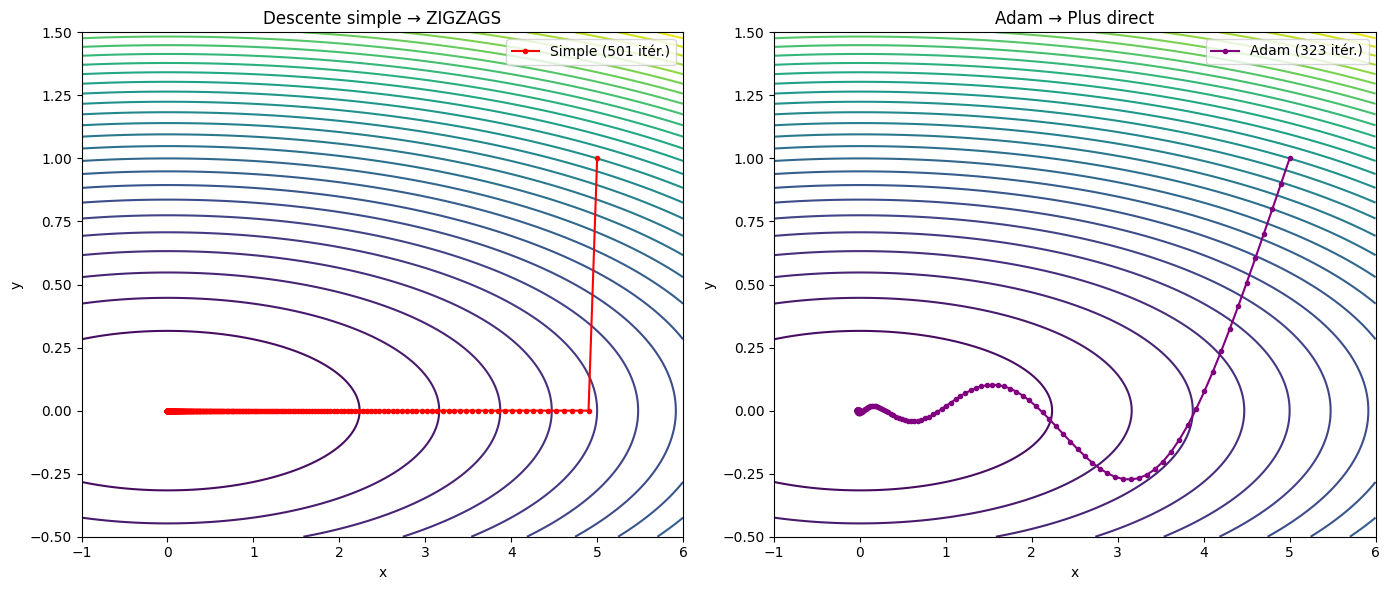


Résultat :
  Simple : 501 itérations (zigzags visibles)
  Adam   : 323 itérations (trajectoire plus directe)

✓ Figure sauvegardée : exp3_piege_ravine.png


In [21]:
print("\n" + "="*70)
print("  EXPÉRIENCE 3 : Piège des ravines (zigzags)")
print("="*70)

# Fonction avec ravine prononcée : gamma=50
f_ravine = lambda x: quadratique(x, gamma=50)
grad_f = lambda x: gradient_numerique(f_ravine, x)
x0 = np.array([5.0, 1.0])

# Descente simple → zigzags
_, traj_simple = gradient_descent(f_ravine, grad_f, x0, learning_rate=0.01, max_iter=500)

# Adam → plus direct
_, traj_adam = gradient_descent_adam(f_ravine, grad_f, x0, learning_rate=0.1, max_iter=500)

# Figure côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.sca(axes[0])
plot_contours(f_ravine, xlim=(-1, 6), ylim=(-0.5, 1.5), levels=30)
plot_trajectory(traj_simple, color='red', label=f'Simple ({len(traj_simple)} itér.)')
plt.title("Descente simple → ZIGZAGS")
plt.legend()

plt.sca(axes[1])
plot_contours(f_ravine, xlim=(-1, 6), ylim=(-0.5, 1.5), levels=30)
plot_trajectory(traj_adam, color='purple', label=f'Adam ({len(traj_adam)} itér.)')
plt.title("Adam → Plus direct")
plt.legend()

plt.tight_layout()
plt.savefig('../figures/exp3_piege_ravine.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nRésultat :")
print(f"  Simple : {len(traj_simple)} itérations (zigzags visibles)")
print(f"  Adam   : {len(traj_adam)} itérations (trajectoire plus directe)")
print("\n✓ Figure sauvegardée : exp3_piege_ravine.png")

### 3.2 Piège des plateaux


  EXPÉRIENCE 3 (suite) : Piège des plateaux


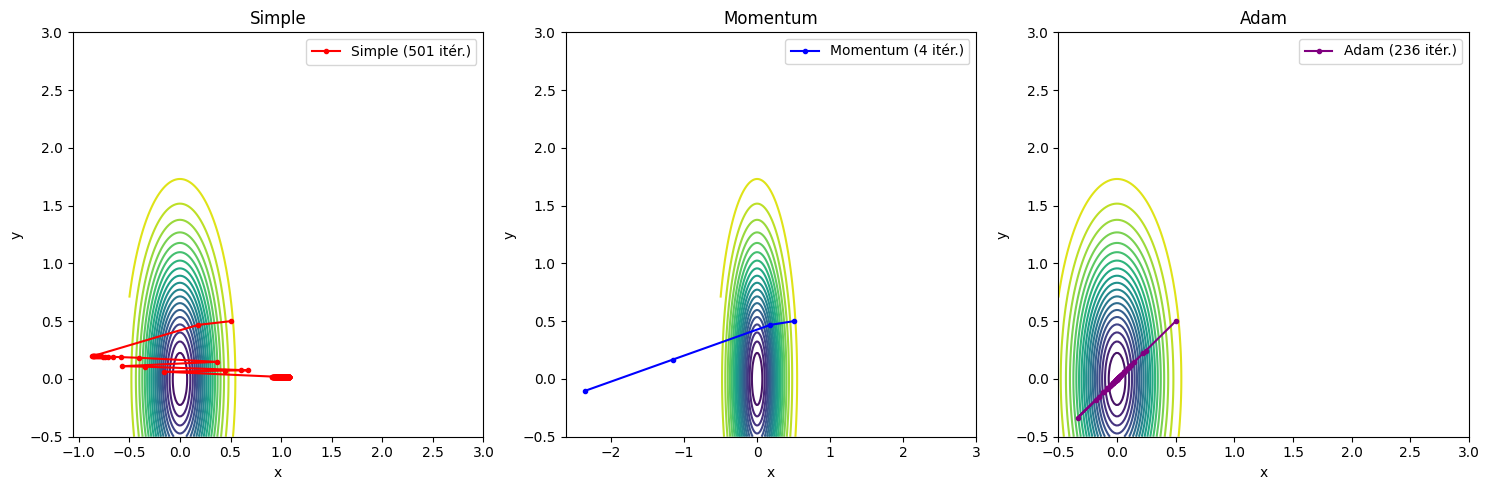


Résultat (départ sur plateau [2, 2]) :
  Simple   : 501 itérations
  Momentum : 4 itérations
  Adam     : 236 itérations

✓ Figure sauvegardée : exp3_piege_plateau.png


In [22]:
print("\n" + "="*70)
print("  EXPÉRIENCE 3 (suite) : Piège des plateaux")
print("="*70)

# g(x,y) = 1 - exp(-10x² - y²) → plateau loin de l'origine
grad_f = lambda x: gradient_numerique(exponentielle, x)
# Point de départ plus proche pour voir le mvmt (au lieu de 2.0)
x0 = np.array([0.5, 0.5])  # départ sur le plateau

_, traj_simple = gradient_descent(exponentielle, grad_f, x0, learning_rate=0.5, max_iter=500)
_, traj_momentum = gradient_descent_momentum(exponentielle, grad_f, x0, learning_rate=0.5, max_iter=500)
_, traj_adam = gradient_descent_adam(exponentielle, grad_f, x0, learning_rate=0.5, max_iter=500)

# Figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, traj, color) in zip(axes, [("Simple", traj_simple, "red"), 
                                           ("Momentum", traj_momentum, "blue"),
                                           ("Adam", traj_adam, "purple")]):
    plt.sca(ax)
    plot_contours(exponentielle, xlim=(-0.5, 3), ylim=(-0.5, 3), levels=20)
    plot_trajectory(traj, color=color, label=f'{name} ({len(traj)} itér.)')
    plt.title(f"{name}")
    plt.legend()

plt.tight_layout()
plt.savefig('../figures/exp3_piege_plateau.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nRésultat (départ sur plateau [2, 2]) :")
print(f"  Simple   : {len(traj_simple)} itérations")
print(f"  Momentum : {len(traj_momentum)} itérations")
print(f"  Adam     : {len(traj_adam)} itérations")
print("\n✓ Figure sauvegardée : exp3_piege_plateau.png")

### 3.3 Piège des minima locaux


  EXPÉRIENCE 3 (suite) : Piège des minima locaux

Himmelblau - Différents minima selon le point de départ :
--------------------------------------------------
  Départ [+0, +0] → Arrivée [+3.000, +2.000]
  Départ [+4, +4] → Arrivée [+3.000, +2.000]
  Départ [-4, +4] → Arrivée [-2.805, +3.131]
  Départ [-4, -4] → Arrivée [-3.779, -3.283]
  Départ [+4, -4] → Arrivée [+3.584, -1.848]


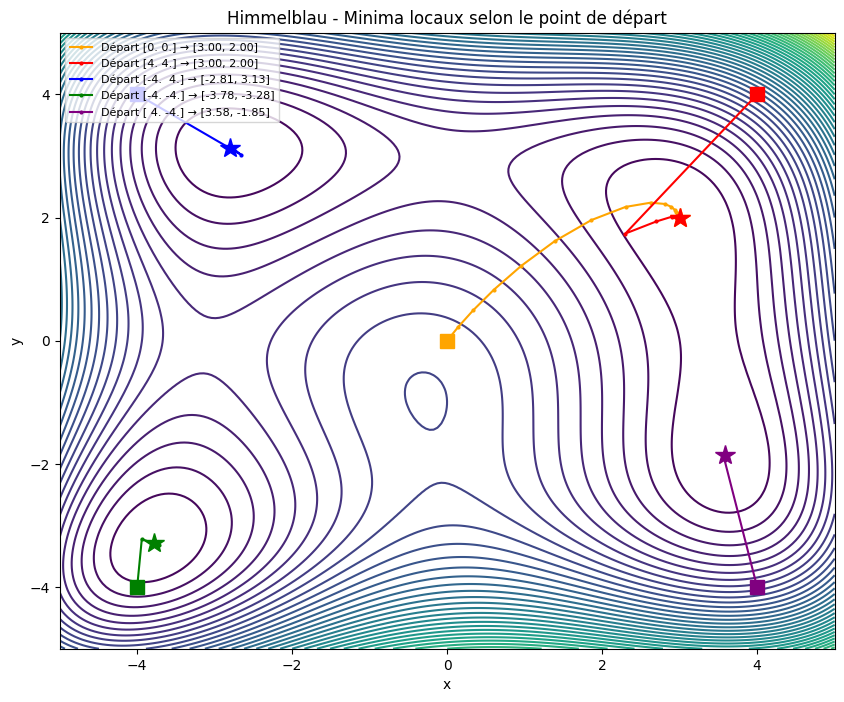


✓ Figure sauvegardée : exp3_piege_minima_locaux.png


In [23]:
print("\n" + "="*70)
print("  EXPÉRIENCE 3 (suite) : Piège des minima locaux")
print("="*70)

# Himmelblau a 4 minima différents
grad_f = lambda x: gradient_numerique(himmelblau, x)

departs = [
    (np.array([0.0, 0.0]), "orange"),
    (np.array([4.0, 4.0]), "red"),
    (np.array([-4.0, 4.0]), "blue"),
    (np.array([-4.0, -4.0]), "green"),
    (np.array([4.0, -4.0]), "purple"),
]

plt.figure(figsize=(10, 8))
plot_contours(himmelblau, xlim=(-5, 5), ylim=(-5, 5), levels=50)

print("\nHimmelblau - Différents minima selon le point de départ :")
print("-" * 50)

for x0, color in departs:
    sol, traj = gradient_descent(himmelblau, grad_f, x0, learning_rate=0.01, max_iter=1000)
    plt.plot(traj[:, 0], traj[:, 1], '-o', color=color, markersize=2, 
             label=f'Départ {x0} → [{sol[0]:.2f}, {sol[1]:.2f}]')
    plt.plot(x0[0], x0[1], 's', color=color, markersize=10)  # carré = départ
    plt.plot(sol[0], sol[1], '*', color=color, markersize=15)  # étoile = arrivée
    print(f"  Départ [{x0[0]:+.0f}, {x0[1]:+.0f}] → Arrivée [{sol[0]:+.3f}, {sol[1]:+.3f}]")

plt.title("Himmelblau - Minima locaux selon le point de départ")
plt.legend(loc='upper left', fontsize=8)
plt.savefig('../figures/exp3_piege_minima_locaux.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figure sauvegardée : exp3_piege_minima_locaux.png")

## Expérience 4 : Cas d'échec

In [24]:
print("\n" + "="*70)
print("  EXPÉRIENCE 4 : CAS D'ÉCHEC (ce que le prof veut voir !)")
print("="*70)

# --- CAS 1 : Divergence avec learning rate trop grand ---
print("\n--- CAS D'ÉCHEC 1 : Divergence ---")

x0 = np.array([-1.0, -1.0])
grad_f = lambda x: gradient_numerique(rosenbrock, x)

# lr=0.1 est trop grand pour Rosenbrock
sol_fail, traj_fail = gradient_descent(rosenbrock, grad_f, x0, learning_rate=0.1, max_iter=50)
cost_fail = rosenbrock(sol_fail)

print(f"  Fonction    : Rosenbrock")
print(f"  Départ      : {x0}")
print(f"  lr          : 0.1 (trop grand)")
print(f"  Cost final  : {cost_fail:.2e}")
if cost_fail > 100:
    print(f"  Résultat    : ❌ DIVERGE !")
print(f"\n  EXPLICATION : Le learning rate est trop grand pour cette fonction.")
print(f"                La surface est très 'raide', un grand pas nous éjecte loin.")

# Solution
sol_ok, traj_ok = gradient_descent(rosenbrock, grad_f, x0, learning_rate=0.001, max_iter=10000)
print(f"\n  SOLUTION    : Réduire lr à 0.001")
print(f"  Résultat    : ✓ Converge en {len(traj_ok)} itérations")
print(f"  Solution    : [{sol_ok[0]:.4f}, {sol_ok[1]:.4f}] (attendu : [1, 1])")


# --- CAS 2 : Oscillations dans une ravine ---
print("\n--- CAS D'ÉCHEC 2 : Oscillations (zigzags) ---")

f_ravine = lambda x: quadratique(x, gamma=100)
grad_f = lambda x: gradient_numerique(f_ravine, x)
x0 = np.array([5.0, 5.0])

sol_fail, traj_fail = gradient_descent(f_ravine, grad_f, x0, learning_rate=0.015, max_iter=200)

print(f"  Fonction    : x² + 100y² (ravine très prononcée)")
print(f"  Départ      : {x0}")
print(f"  lr          : 0.015")
print(f"  Après 200 itér. : [{sol_fail[0]:.4f}, {sol_fail[1]:.4f}]")
print(f"  Cost        : {f_ravine(sol_fail):.6f}")
print(f"\n  EXPLICATION : La descente fait des zigzags perpendiculaires à la ravine")
print(f"                au lieu d'aller droit vers le minimum.")

# Solution
sol_ok, traj_ok = gradient_descent_adam(f_ravine, grad_f, x0, learning_rate=0.5, max_iter=200)
print(f"\n  SOLUTION    : Utiliser Adam")
print(f"  Résultat    : [{sol_ok[0]:.4f}, {sol_ok[1]:.4f}] en {len(traj_ok)} itér.")


# --- CAS 3 : Stagnation sur un plateau ---
print("\n--- CAS D'ÉCHEC 3 : Stagnation sur plateau ---")

x0 = np.array([3.0, 3.0])
grad_f = lambda x: gradient_numerique(exponentielle, x)

sol_fail, traj_fail = gradient_descent(exponentielle, grad_f, x0, learning_rate=0.5, max_iter=50)

print(f"  Fonction    : 1 - exp(-10x² - y²)")
print(f"  Départ      : {x0} (loin du minimum, sur le plateau)")
print(f"  Après 50 itér. : [{sol_fail[0]:.4f}, {sol_fail[1]:.4f}]")
print(f"\n  EXPLICATION : Sur le plateau, le gradient est quasi nul.")
print(f"                Les pas sont minuscules, on avance à peine.")

# Solution
sol_ok, traj_ok = gradient_descent_momentum(exponentielle, grad_f, x0, learning_rate=0.5, max_iter=500)
print(f"\n  SOLUTION    : Utiliser Momentum (garde de l'élan)")
print(f"  Résultat    : [{sol_ok[0]:.4f}, {sol_ok[1]:.4f}] en {len(traj_ok)} itér.")



  EXPÉRIENCE 4 : CAS D'ÉCHEC (ce que le prof veut voir !)

--- CAS D'ÉCHEC 1 : Divergence ---
  Fonction    : Rosenbrock
  Départ      : [-1. -1.]
  lr          : 0.1 (trop grand)
  Cost final  : 9.85e+95
  Résultat    : ❌ DIVERGE !

  EXPLICATION : Le learning rate est trop grand pour cette fonction.
                La surface est très 'raide', un grand pas nous éjecte loin.

  SOLUTION    : Réduire lr à 0.001
  Résultat    : ✓ Converge en 10001 itérations
  Solution    : [0.9916, 0.9832] (attendu : [1, 1])

--- CAS D'ÉCHEC 2 : Oscillations (zigzags) ---
  Fonction    : x² + 100y² (ravine très prononcée)
  Départ      : [5. 5.]
  lr          : 0.015
  Après 200 itér. : [3.2760, 36634097809.7684]
  Cost        : 134205712233568040648704.000000

  EXPLICATION : La descente fait des zigzags perpendiculaires à la ravine
                au lieu d'aller droit vers le minimum.

  SOLUTION    : Utiliser Adam
  Résultat    : [-0.0000, -0.0000] en 201 itér.

--- CAS D'ÉCHEC 3 : Stagnation sur 

## Expérience 5 : Dual vs Numérique

In [25]:
print("\n" + "="*70)
print("  EXPÉRIENCE 5 : Dual vs Numérique")
print("="*70)

# Test sur une fonction simple d'abord (booth)
x_test = np.array([2.0, 3.0])

grad_num = gradient_numerique(booth, x_test)
grad_dual = gradient_dual(booth, x_test)

print(f"\nTest sur Booth au point {x_test} :")
print(f"  Gradient numérique : [{grad_num[0]:.6f}, {grad_num[1]:.6f}]")
print(f"  Gradient dual      : [{grad_dual[0]:.6f}, {grad_dual[1]:.6f}]")
print(f"  Différence absolue : [{abs(grad_num[0]-grad_dual[0]):.2e}, {abs(grad_num[1]-grad_dual[1]):.2e}]")

# Test sur plusieurs fonctions
print(f"\nComparaison sur plusieurs fonctions :")
print("-" * 60)

fonctions_test = [
    ("Booth", booth),
    ("Quadratique", lambda x: quadratique(x, gamma=5)),
    ("Rosenbrock", rosenbrock),
    ("Himmelblau", himmelblau),
]

for nom, f in fonctions_test:
    grad_num = gradient_numerique(f, x_test)
    grad_dual = gradient_dual(f, x_test)
    diff = np.linalg.norm(grad_num - grad_dual)
    print(f"  {nom:<15} : différence = {diff:.2e}")

print(f"\n→ Les deux méthodes donnent des résultats très proches !")
print(f"  La méthode duale est exacte (pas d'approximation)")
print(f"  La méthode numérique est une approximation mais très précise")




  EXPÉRIENCE 5 : Dual vs Numérique

Test sur Booth au point [2. 3.] :
  Gradient numérique : [10.000050, 8.000050]
  Gradient dual      : [10.000000, 8.000000]
  Différence absolue : [5.00e-05, 5.00e-05]

Comparaison sur plusieurs fonctions :
------------------------------------------------------------
  Booth           : différence = 7.07e-05
  Quadratique     : différence = 5.10e-05
  Rosenbrock      : différence = 1.80e-02
  Himmelblau      : différence = 4.59e-04

→ Les deux méthodes donnent des résultats très proches !
  La méthode duale est exacte (pas d'approximation)
  La méthode numérique est une approximation mais très précise


# Surfaces 3D (bonus pour rapport)

In [ ]:
print("\n" + "="*70)
print("  BONUS : Surfaces 3D pour le rapport")
print("="*70)

# Booth en 3D
plot_surface_3d(booth, xlim=(-5, 5), ylim=(-2, 6), title="Booth - Surface 3D")
plt.savefig('../figures/surface3d_booth.png', dpi=150, bbox_inches='tight')
plt.show()

# Rosenbrock en 3D
plot_surface_3d(rosenbrock, xlim=(-2, 2), ylim=(-1, 3), title="Rosenbrock - Surface 3D")
plt.savefig('../figures/surface3d_rosenbrock.png', dpi=150, bbox_inches='tight')
plt.show()

# Himmelblau en 3D
plot_surface_3d(himmelblau, xlim=(-5, 5), ylim=(-5, 5), title="Himmelblau - Surface 3D (4 minima)")
plt.savefig('../figures/surface3d_himmelblau.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figures 3D sauvegardées")

# Récap final

In [ ]:
print("\n" + "="*70)
print("  RÉCAPITULATIF - Figures générées")
print("="*70)

figures = [
    "exp1_booth_comparaison.png",
    "exp1_booth_convergence.png", 
    "exp1_rosenbrock_comparaison.png",
    "exp1_rosenbrock_convergence.png",
    "exp1_quadratique_comparaison.png",
    "exp3_piege_ravine.png",
    "exp3_piege_plateau.png",
    "exp3_piege_minima_locaux.png",
    "surface3d_booth.png",
    "surface3d_rosenbrock.png",
    "surface3d_himmelblau.png",
]

print("\nFigures dans le dossier figures/ :")
for fig in figures:
    print(f"  ✓ {fig}")

print("\n" + "="*70)
print("  TERMINÉ !")
print("="*70)


# Simple vs Adam (test)

In [ ]:
# ===========================================
# FIGURES PROPRES : Simple vs Adam seulement
# ===========================================

import numpy as np
import matplotlib.pyplot as plt
from src.functions import booth, rosenbrock, quadratique
from src.gradients import gradient_numerique
from src.optimizers import gradient_descent, gradient_descent_adam

# --- BOOTH : Simple vs Adam ---
x0 = np.array([-4.0, 3.0])
grad_booth = lambda x: gradient_numerique(booth, x)

sol_simple, traj_simple = gradient_descent(booth, grad_booth, x0, learning_rate=0.1)
sol_adam, traj_adam = gradient_descent_adam(booth, grad_booth, x0, learning_rate=0.1)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
x = np.linspace(-5, 5, 100)
y = np.linspace(-2, 8, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([[booth(np.array([xi, yi])) for xi, yi in zip(xrow, yrow)] for xrow, yrow in zip(X, Y)])

ax.contour(X, Y, Z, levels=30, cmap='viridis')
ax.plot(traj_simple[:, 0], traj_simple[:, 1], 'r-o', markersize=3, label=f'Simple ({len(traj_simple)} itér.)')
ax.plot(traj_adam[:, 0], traj_adam[:, 1], 'b-o', markersize=3, label=f'Adam ({len(traj_adam)} itér.)')
ax.scatter([1], [3], color='gold', s=200, marker='*', zorder=5, label='Minimum (1, 3)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Booth - Comparaison Simple vs Adam')
ax.legend()
plt.savefig('../figures/booth_simple_vs_adam.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Simple : {len(traj_simple)} itérations → {sol_simple}")
print(f"Adam   : {len(traj_adam)} itérations → {sol_adam}")

# Cas d'échec / divergence (test)

In [ ]:
# ===========================================
# CAS D'ÉCHEC : Pourquoi Momentum diverge
# ===========================================

from src.optimizers import gradient_descent_momentum

# Test avec différents learning rates
x0 = np.array([-4.0, 3.0])
grad_booth = lambda x: gradient_numerique(booth, x)

print("=== Impact du learning rate sur Momentum ===")
print("Booth, départ [-4, 3], momentum=0.9\n")

for lr in [0.01, 0.05, 0.1, 0.2]:
    sol, traj = gradient_descent_momentum(booth, grad_booth, x0, learning_rate=lr, momentum=0.9, max_iter=500)
    cost = booth(sol)
    status = "✓ Converge" if cost < 1 else "❌ DIVERGE"
    print(f"lr={lr:0.2f} : {status}, {len(traj)} itér., cost={cost:.2e}")

# Figure montrant la divergence
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, lr, title in zip(axes, [0.05, 0.2], ['lr=0.05 (converge)', 'lr=0.2 (diverge)']):
    sol, traj = gradient_descent_momentum(booth, grad_booth, x0, learning_rate=lr, momentum=0.9, max_iter=100)
    
    # Limiter l'affichage si divergence
    if booth(sol) > 1000:
        traj = traj[:20]  # Montrer seulement les 20 premières itérations
    
    ax.contour(X, Y, Z, levels=30, cmap='viridis')
    ax.plot(traj[:, 0], traj[:, 1], 'b-o', markersize=4, label=f'Momentum ({len(traj)} itér.)')
    ax.scatter([1], [3], color='gold', s=200, marker='*', zorder=5)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-2, 8)
    ax.set_title(title)
    ax.legend()

plt.suptitle("CAS D'ÉCHEC : Momentum diverge si learning rate trop grand", fontsize=14)
plt.savefig('../figures/echec_momentum_divergence.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# ===========================================
# CAS D'ÉCHEC 1 : Divergence sur Rosenbrock
# ===========================================

x0 = np.array([-1.0, -1.0])
grad_rosen = lambda x: gradient_numerique(rosenbrock, x)

print("=== Rosenbrock - Impact du learning rate ===\n")

for lr in [0.0001, 0.001, 0.01, 0.1]:
    sol, traj = gradient_descent(rosenbrock, grad_rosen, x0, learning_rate=lr, max_iter=5000)
    cost = rosenbrock(sol)
    status = "✓" if cost < 1 else "❌ DIVERGE" if cost > 1e10 else "⚠️ Pas convergé"
    print(f"lr={lr} : {status}, {len(traj)} itér., cost={cost:.2e}, sol={sol}")

In [ ]:
# ===========================================
# CAS D'ÉCHEC 2 : Oscillations dans ravine très prononcée
# ===========================================

def ravine_extreme(x):
    """f(x,y) = x² + 100*y² - ravine très étroite"""
    return x[0]**2 + 100 * x[1]**2

x0 = np.array([5.0, 5.0])
grad_ravine = lambda x: gradient_numerique(ravine_extreme, x)

# Simple oscille, Adam va droit
sol_simple, traj_simple = gradient_descent(ravine_extreme, grad_ravine, x0, learning_rate=0.009, max_iter=500)
sol_adam, traj_adam = gradient_descent_adam(ravine_extreme, grad_ravine, x0, learning_rate=0.5, max_iter=500)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Contours
x = np.linspace(-1, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 100 * Y**2

for ax, traj, name, color in zip(axes, [traj_simple, traj_adam], ['Simple (oscillations)', 'Adam (direct)'], ['red', 'purple']):
    ax.contour(X, Y, Z, levels=30, cmap='viridis')
    ax.plot(traj[:, 0], traj[:, 1], f'{color[0]}-o', markersize=2, label=f'{name} ({len(traj)} itér.)')
    ax.scatter([0], [0], color='gold', s=200, marker='*', zorder=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(name)
    ax.legend()

plt.suptitle("Ravine (γ=100) : Simple oscille, Adam converge directement", fontsize=14)
plt.savefig('../figures/echec_oscillations_ravine.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Simple : {len(traj_simple)} itér., solution = {sol_simple}")
print(f"Adam   : {len(traj_adam)} itér., solution = {sol_adam}")